In [7]:
!pip install yfinance
!pip install bs4

In [46]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [35]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [88]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = float(col[1].text.replace(",", "").replace("$", ""))
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue.tail()

,Date,Revenue
8,2012,413.0
9,2011,204.0
10,2010,117.0
11,2009,112.0
12,2008,15.0


### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [68]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480515,6.773401,6.413184,6.766667,19054000,0.0,0.0
1,2002-02-14,6.850828,6.864294,6.682503,6.733001,2755400,0.0,0.0
2,2002-02-15,6.733003,6.749835,6.632008,6.699337,2097400,0.0,0.0
3,2002-02-19,6.665669,6.665669,6.312187,6.430015,1852600,0.0,0.0
4,2002-02-20,6.463680,6.648837,6.413182,6.648837,1723200,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [90]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = float(col[1].text.replace(",", "").replace("$", ""))
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

gme_revenue.tail()

,Date,Revenue
12,2009,8806.0
13,2008,7094.0
14,2007,5319.0
15,2006,3092.0
16,2005,1843.0


### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

<AxesSubplot:title={'center':'Tesla Revenue'}, xlabel='Date'>

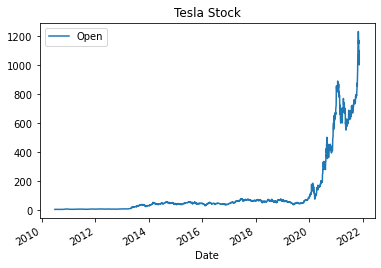

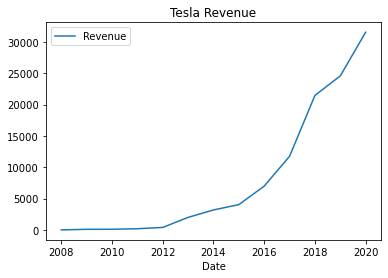

In [89]:
tesla_data.plot(x="Date", y="Open", title="Tesla Stock")

tesla_revenue = tesla_revenue.iloc[::-1]
tesla_revenue.plot(x="Date", y="Revenue", title="Tesla Revenue")

### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

<AxesSubplot:title={'center':'GameStop Revenue'}, xlabel='Date'>

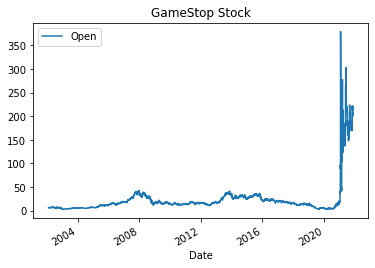

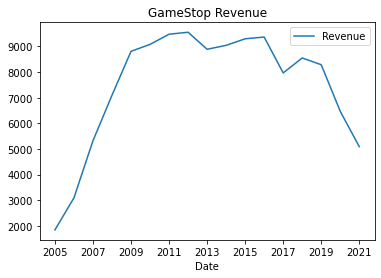

In [91]:
gme_data.plot(x="Date", y="Open", title="GameStop Stock")

gme_revenue = gme_revenue.iloc[::-1]
gme_revenue.plot(x="Date", y="Revenue", title="GameStop Revenue")

### Question 7 - Sharing your Assignment Notebook - 2 Points